In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Run the Analysis from the command-line

## First let's generate a config file:

In [2]:
%%file test.json

{
    "Stage1Process": {
        "config_file": "",
        "input_filename": "~/Data/CTA/Prod3b/gamma/gamma_20deg_0deg_run101___cta-prod3_desert-2150m-Paranal-merged.simtel.gz",
        "log_datefmt": "%Y-%m-%d %H:%M:%S",
        "log_format": "%(levelname)s [%(name)s] (%(module)s/%(funcName)s): %(message)s",
        "log_level": 20,
        "output_filename": "dl1_events.h5",
        "write_images": false
    },
    "EventSource": {
        "allowed_tels": [],
        "back_seekable": false,
        "input_url": "/Users/kkosack/Data/CTA/Prod3b/gamma/gamma_20deg_0deg_run101___cta-prod3_desert-2150m-Paranal-merged.simtel.gz",
        "max_events": 10,
        "skip_calibration_events": true
    },
    "CameraCalibrator": {},
    "ImageCleaner": {
        "boundary_threshold_pe": {
            "*": 5.0,
            "type LST_LST_LSTCam" : 3.0,
            "type MST_MST_NectarCam": 4.0
        },
        "method": "tailcuts-standard",
        "min_picture_neighbors": 2,
        "picture_threshold_pe": {
            "*":10.0,
            "type LST_LST_LSTCam": 6.0,
            "type MST_MST_NectarCam": 8.0
        }
    },
    "ImageDataChecker": {
        "selection_functions": {
            "enough_pixels": "lambda im: np.count_nonzero(im) > 2",
            "enough_charge": "lambda im: im.sum() > 100"
        }
    }
}


Overwriting test.json


## Now, we run the DL1 Processor

We can also specify options on the command-line, but note that in the current implementation of traitlets.application (on which ctapipe.core.Tool is based), it seems that config-file options override command-line ones, so unless you remove the option from the config file, any command-line option is ignored. 

In [3]:
! rm -fv dl1_events.h5
%run ctapipe_stage1.py --config=test.json

removed 'dl1_events.h5'


WARNING [Stage1Process] (configurable/_load_config): Config option `input_filename` not recognized by `Stage1Process`.  Did you mean `output_filename`?
INFO [Stage1Process] (tool/initialize): ctapipe version 0.7.0.post5+git6cafa86
INFO [Stage1Process] (tool/run): Starting: ctapipe-stage1-process
/Users/kkosack/anaconda3/envs/cta-dev/lib/python3.7/site-packages/traitlets/config/configurable.py:84: UserWarning: Config option `method` not recognized by `TailcutsImageCleaner`.
  self.config = config
INFO [Stage1Process] (tool/run): CONFIG: {'Stage1Process': {'config_file': 'test.json', 'log_datefmt': '%Y-%m-%d %H:%M:%S', 'log_format': '%(levelname)s [%(name)s] (%(module)s/%(funcName)s): %(message)s', 'log_level': 20, 'output_filename': 'dl1_events.h5', 'write_images': False}, 'SimTelEventSource': {'allowed_tels': set(), 'back_seekable': False, 'input_url': '/Users/kkosack/Data/CTA/Prod3b/gamma/gamma_20deg_0deg_run101___cta-prod3_desert-2150m-Paranal-merged.simtel.gz', 'max_events': 10, 'sk

## Look at the results

First, the event image selection:

In [4]:
tool.check_image

criteria,counts,counts_weighted
str13,int64,int64
TOTAL,79,79
enough_pixels,63,63
enough_charge,33,33


In [5]:
tool.check_image.to_table(functions=True)

criteria,counts,counts_weighted,func
str13,int64,int64,str35
TOTAL,79,79,lambda x: True
enough_pixels,63,63,lambda im: np.count_nonzero(im) > 2
enough_charge,33,33,lambda im: im.sum() > 100


Now just for fun, let's see if we can re-generate the configuration that was used and see if it looks ok.  Notice that even the cut functions are preserved

In [13]:
import json

class SetEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, set):
            return list(obj)
        return json.JSONEncoder.default(self, obj)

print(json.dumps(tool.get_current_config(), cls=SetEncoder, indent=4))

{
    "Stage1Process": {
        "config_file": "test.json",
        "log_datefmt": "%Y-%m-%d %H:%M:%S",
        "log_format": "%(levelname)s [%(name)s] (%(module)s/%(funcName)s): %(message)s",
        "log_level": 20,
        "output_filename": "dl1_events.h5",
        "write_images": false
    },
    "SimTelEventSource": {
        "allowed_tels": [],
        "back_seekable": false,
        "input_url": "/Users/kkosack/Data/CTA/Prod3b/gamma/gamma_20deg_0deg_run101___cta-prod3_desert-2150m-Paranal-merged.simtel.gz",
        "max_events": 10,
        "skip_calibration_events": true
    },
    "CameraCalibrator": {},
    "TailcutsImageCleaner": {
        "boundary_threshold_pe": {
            "*": 5.0,
            "type LST_LST_LSTCam": 3.0,
            "type MST_MST_NectarCam": 4.0
        },
        "min_picture_neighbors": 2,
        "picture_threshold_pe": {
            "*": 10.0,
            "type LST_LST_LSTCam": 6.0,
            "type MST_MST_NectarCam": 8.0
        }
    },
    "

In [12]:
print(json.dumps(tool.config, indent=4))

{
    "Stage1Process": {
        "config_file": "test.json",
        "input_filename": "~/Data/CTA/Prod3b/gamma/gamma_20deg_0deg_run101___cta-prod3_desert-2150m-Paranal-merged.simtel.gz",
        "log_datefmt": "%Y-%m-%d %H:%M:%S",
        "log_format": "%(levelname)s [%(name)s] (%(module)s/%(funcName)s): %(message)s",
        "log_level": 20,
        "output_filename": "dl1_events.h5",
        "write_images": false
    },
    "EventSource": {
        "allowed_tels": [],
        "back_seekable": false,
        "input_url": "/Users/kkosack/Data/CTA/Prod3b/gamma/gamma_20deg_0deg_run101___cta-prod3_desert-2150m-Paranal-merged.simtel.gz",
        "max_events": 10,
        "skip_calibration_events": true
    },
    "CameraCalibrator": {},
    "ImageCleaner": {
        "boundary_threshold_pe": {
            "*": 5.0,
            "type LST_LST_LSTCam": 3.0,
            "type MST_MST_NectarCam": 4.0
        },
        "method": "tailcuts-standard",
        "min_picture_neighbors": 2,
        "

In [10]:
import yaml
print(yaml.dump(tool.get_current_config()))

CameraCalibrator: {}
ImageCleaner:
  boundary_threshold_pe:
    '*': 5.0
    type LST_LST_LSTCam: 3.0
    type MST_MST_NectarCam: 4.0
  method: tailcuts-standard
  min_picture_neighbors: 2
  picture_threshold_pe:
    '*': 10.0
    type LST_LST_LSTCam: 6.0
    type MST_MST_NectarCam: 8.0
ImageDataChecker:
  selection_functions:
    TOTAL: 'lambda x: True'
    enough_charge: 'lambda im: im.sum() > 100'
    enough_pixels: 'lambda im: np.count_nonzero(im) > 2'
SimTelEventSource:
  allowed_tels: !!set {}
  back_seekable: false
  input_url: ~/Data/CTA/Prod3b/gamma/gamma_20deg_0deg_run101___cta-prod3_desert-2150m-Paranal-merged.simtel.gz
  max_events: 10
  skip_calibration_events: true
Stage1Process:
  config_file: test.json
  input_filename: ~/Data/CTA/Prod3b/gamma/gamma_20deg_0deg_run101___cta-prod3_desert-2150m-Paranal-merged.simtel.gz
  log_datefmt: '%Y-%m-%d %H:%M:%S'
  log_format: '%(levelname)s [%(name)s] (%(module)s/%(funcName)s): %(message)s'
  log_level: 20
  output_filename: dl1_ev

# Analyze the output

In [11]:
! h5ls -r dl1_events.h5

/                        Group
/dl1                     Group
/dl1/event               Group
/dl1/event/subarray      Group
/dl1/event/subarray/mc_shower Dataset {10/Inf}
/dl1/event/subarray/trigger Dataset {10/Inf}
/dl1/event/telescope     Group
/dl1/event/telescope/parameters Dataset {33/Inf}
/instrument              Group
/instrument/subarray     Group
/instrument/subarray/layout Dataset {567}
/instrument/subarray/layout.__table_column_meta__ Dataset {15}
/instrument/telescope    Group
/instrument/telescope/camera Group
/instrument/telescope/camera/ASTRICam Dataset {2368}
/instrument/telescope/camera/ASTRICam.__table_column_meta__ Dataset {6}
/instrument/telescope/camera/CHEC Dataset {2048}
/instrument/telescope/camera/CHEC.__table_column_meta__ Dataset {6}
/instrument/telescope/camera/DigiCam Dataset {1296}
/instrument/telescope/camera/DigiCam.__table_column_meta__ Dataset {6}
/instrument/telescope/camera/FlashCam Dataset {1764}
/instrument/telescope/camera/FlashCam.__table_column_

In [12]:
import pandas as pd

In [13]:
params = pd.read_hdf("dl1_events.h5", key="/dl1/event/telescope/parameters").set_index(
    ["event_id", "tel_id"]
)
params.head(20)

concentration_cog  concentration_core  concentration_pixel  \
event_id tel_id                                                               
3306     9                0.728344            0.626532             0.371465   
10404    3                0.363781            0.264635             0.206713   
         4                0.359970            0.359970             0.281491   
         5                0.149601            0.149601             0.288414   
         6                0.390092            0.201016             0.189076   
         8                0.428538            0.399593             0.331466   
         9                0.302217            0.441868             0.201414   
11803    1                0.222352            0.312129             0.101642   
         3                0.087912            0.305278             0.252960   
         4                0.000000            0.207932             0.192117   
         5                0.132097            0.400509             0.109485   
         6                0.216852            0.225361             0.122912   
         8                0.054758            0.473440             0.119482   
         10               0.039421            0.260646             0.109216   
         11               0.195473            0.359149             0.126341   
         14               0.379081            0.225287             0.163240   
         22               0.562555            0.502832             0.273975   
         27               0.000000            0.415211             0.170083   
         30               0.449569            0.626961             0.199366   
         55               0.221266            0.348412             0.138844   

                 hillas_intensity  hillas_kurtosis  hillas_length  hillas_phi  \
event_id tel_id                                                                 
3306     9             103.835571         2.914605       0.050050  -86.661888   
10404    3             144.006817         2.420425       0.061053 -165.836492   
         4             146.555633         1.650568       0.049162  146.843861   
         5             150.855327         1.607886       0.054738 -157.838974   
         6             110.420223         1.907238       0.057612  150.128126   
         8             120.554090         1.952172       0.062161  172.594662   
         9             129.009101         1.987750       0.053399  140.177955   
11803    1             109.586251         2.053391       0.242738   61.310022   
         3             274.653468         1.825560       0.105337   86.041200   
         4             108.687137         1.191393       0.164632   83.496016   
         5             459.297970         2.124754       0.143416   79.961525   
         6             115.629822         2.068397       0.151677   59.642538   
         8             169.053619         2.327373       0.196833   98.958670   
         10            414.960446         1.839343       0.155473   72.266509   
         11            130.043584         2.086616       0.086010  107.717728   
         14            168.970598         2.019702       0.058914   57.576078   
         22            171.422781         2.803458       0.044505   49.268461   
         27            217.107845         3.831156       0.307336  121.722840   
         30            222.010650         2.676409       0.050686  -61.524611   
         55            217.482351         2.418705       0.101921   61.062289   

                 hillas_psi  hillas_r  hillas_skewness  ...  \
event_id tel_id                                         ...   
3306     9       -76.064123  0.317075         0.919124  ...   
10404    3         8.625627  0.303641        -0.217903  ...   
         4       -56.833858  0.283519        -0.284635  ...   
         5        11.571300  0.241917        -0.075203  ...   
         6        67.562822  0.056790        -0.338927  ...   
         8       -17.901173  0.386496        -0.561411

In [14]:
params.columns

Index(['concentration_cog', 'concentration_core', 'concentration_pixel',
       'hillas_intensity', 'hillas_kurtosis', 'hillas_length', 'hillas_phi',
       'hillas_psi', 'hillas_r', 'hillas_skewness', 'hillas_width', 'hillas_x',
       'hillas_y', 'leakage_one_pixel_intensity', 'leakage_one_pixel_percent',
       'leakage_two_pixel_intensity', 'leakage_two_pixel_percent', 'obs_id',
       'tel_type_id', 'timing_deviation', 'timing_intercept',
       'timing_intercept_err', 'timing_slope', 'timing_slope_err'],
      dtype='object')

# statistics for each telescope type

Note that right now the `tel_type_id` is stored as the hash of it's name (e.g. `hash("LST_LST_LSTCam")` for efficiency).
It should be simple to make a function to go back to the telescope type name by comparing the hashes

In [15]:
params.groupby("tel_type_id").describe().T

tel_type_id                 -6205439393100968603  -3571878806979669936  \
concentration_cog    count             20.000000              6.000000   
                     mean               0.249177              0.408561   
                     std                0.172772              0.236904   
                     min                0.000000              0.000000   
                     25%                0.126248              0.364725   
                     50%                0.219602              0.414325   
                     75%                0.360922              0.534309   
                     max                0.728344              0.700223   
concentration_core   count             20.000000              6.000000   
                     mean               0.346456              0.450459   
                     std                0.111605              0.131582   
                     min                0.149601              0.225287   
                     25%                0.263638              0.425286   
                     50%                0.359560              0.466233   
                     75%                0.406369              0.496363   
                     max                0.626532              0.626961   
concentration_pixel  count             20.000000              6.000000   
                     mean               0.186953              0.277194   
                     std                0.082519              0.127206   
                     min                0.101642              0.163240   
                     25%                0.117971              0.177404   
                     50%                0.173804              0.236671   
                     75%                0.237338              0.353152   
                     max                0.371465              0.476957   
hillas_intensity     count             20.000000              6.000000   
                     mean             180.710366            188.862092   
                     std               98.550793             27.433297   
                     min              103.835571            155.890519   
                     25%              119.323023            169.583644   
                     50%              148.405050            184.596471   
...                                          ...                   ...   
timing_intercept     std                0.958071              0.658008   
                     min                6.963904              6.056809   
                     25%                9.113266              6.521653   
                     50%                9.479825              6.662900   
                     75%               10.245557              7.117494   
                     max               10.968238              7.936480   
timing_intercept_err count             20.000000              6.000000   
                     mean               0.133655              0.114810   
                     std                0.043059              0.061751   
                     min                0.063891              0.046536   
                     25%                0.102364              0.085020   
                     50%                0.130803              0.101507   
                     75%                0.156308              0.124843   
                     max                0.232753              0.227163   
timing_slope         count             20.000000              6.000000   
                     mean               2.976949              2.414134   
                     std                8.458108              6.969434   
                     min              -14.380716             -3.845105   
                     25%               -2.210467             -0.880449   
                     50%                3.928257              0.639443   
                     75%               11.188917              2.034749   
                     max               14.657192             15.938254   
timi

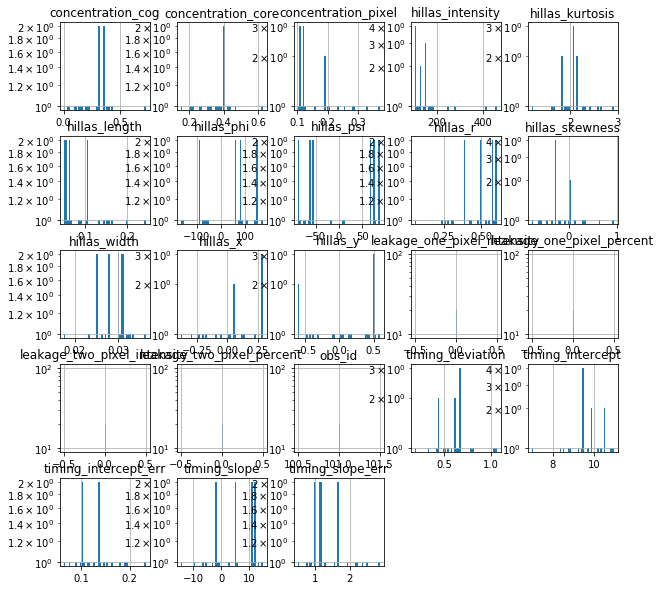

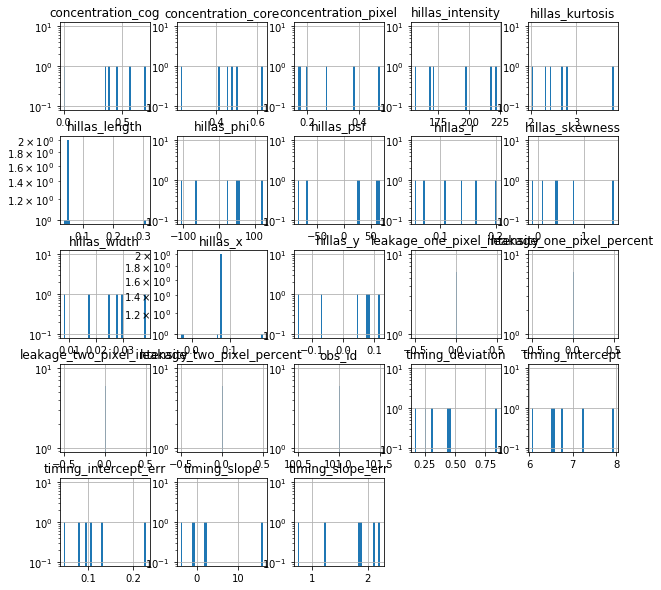

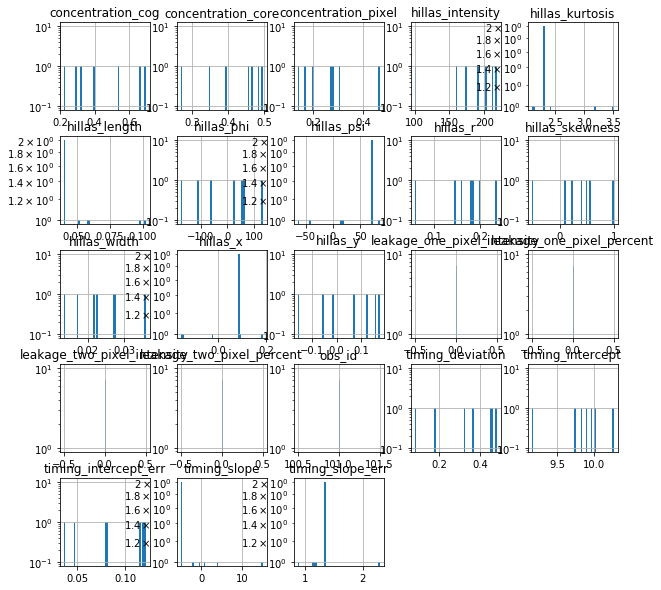

In [16]:
g = params.groupby("tel_type_id").hist(figsize=(10,10), bins=50, log=True)

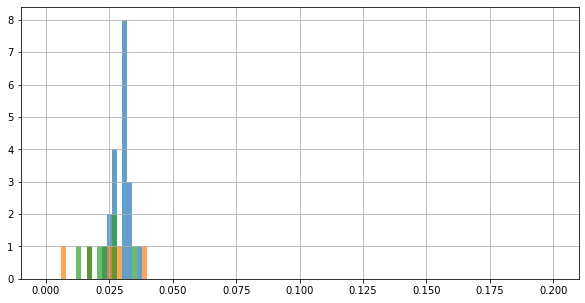

In [17]:
g = params.groupby("tel_type_id").hillas_width.hist(figsize=(10,5), bins=100, range=[0.0,0.2], alpha=0.7)

In [14]:
from ctapipe_stage1 import TelescopeParameter, TelescopeParameterResolver

In [15]:
p = TelescopeParameter()

In [16]:
p.validate(None, { '*': 1.0, 'type SST_1M_CHEC':3.0, 'type MST_MST_FlashCam': 2})

{'*': 1.0, 'type SST_1M_CHEC': 3.0, 'type MST_MST_FlashCam': 2.0}

In [17]:
p.validate(None, {
    '*': 6.0,
    'type SST_1M_CHEC': 4.0,
    'id  6': 4.0,
})

TraitError: couldn't parse telescope id ''

In [41]:
param = p.validate(
    None,  {
        '*': 1.0, 'type SST_1M_CHEC':3.0, 
        'type MST_MST_FlashCam': 2,
        'type LST_LST_LSTCam' : 8.0,
        'id 128': 15.0,
    }
)
resolver = TelescopeParameterResolver(subarray=tool.subarray, tel_param=param)


In [43]:
for tel_id in [1,2,25,128,300]:
    print(tel_id, resolver.get_value_for_telecscope_id(tel_id))

1 8.0
2 8.0
25 2.0
128 15.0
300 1.0


In [1]:
from ctapipe_stage1 import ImageCleaner

In [3]:
clean = ImageCleaner()
clean

method,tailcuts-standard,Image Cleaning Method to use (default: tailcuts-standard)


In [5]:
ImageCleaner.from_name("TailcutsImageCleaner")

boundary_threshold_pe,{'*': 5.0},second-level threshold in photoelectrons (default: traitlets.Undefined)
method,tailcuts-standard,Image Cleaning Method to use (default: tailcuts-standard)
min_picture_neighbors,2,Minimum number of neighbors above threshold to consider (default: 2)
picture_threshold_pe,{'*': 10.0},top-level threshold in photoelectrons (default: traitlets.Undefined)
